In [1]:
import sys
import os
import numpy as np
import xarray as xr
import pandas as pd

from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib
import matplotlib.ticker as ticker

from matplotlib.collections import LineCollection
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
matplotlib.rcParams.update({'font.size' :22})

Text(0, 0.5, 'Date')

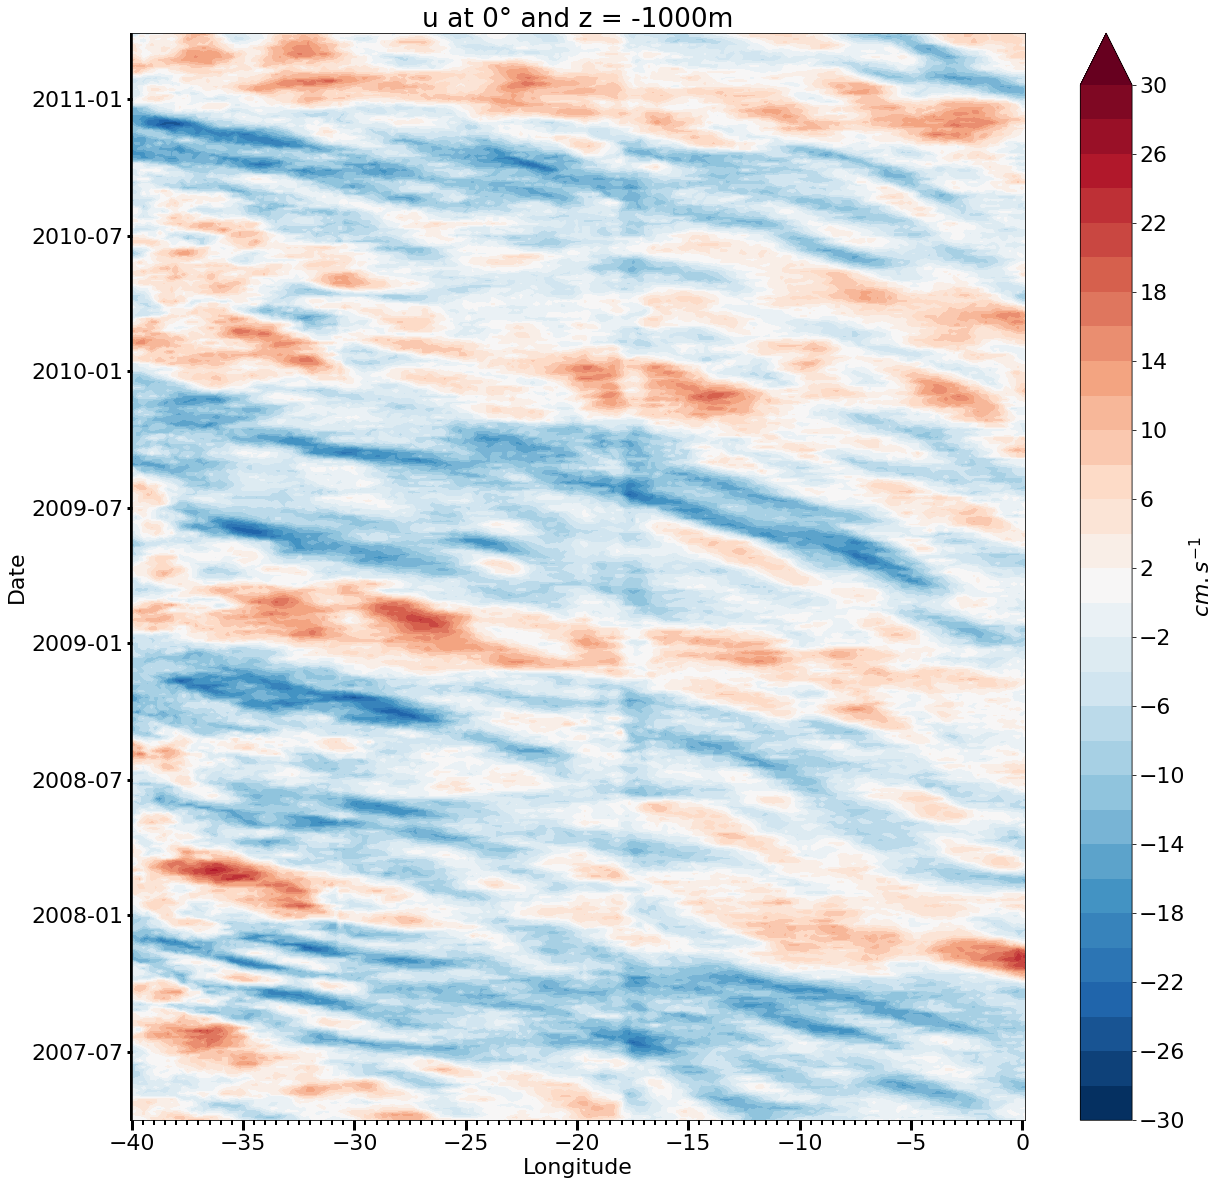

In [3]:
path = "/home/durand/Documents/GIGATL/"
ds = xr.open_dataset(path + "GIGATL3_Equator.nc")
z = -1000
latitude = 0
#####################
### Compute ###
ds = ds.sel(z_rho = z)
ds = ds.sel(y_rho = latitude, method = 'nearest')*100 # x100 to convert m/s to cm/s

#####################
### Value to plot ###
title = "u at "+str(latitude)+"° and z = " +str(z)+"m"
valuePlot = ds.uCart #!!!! Choix de la quantité à plot
xmin = -40.
xmax = 0.1

#####################
plt.figure(figsize=(20,20))
ax = plt.gca()
axisy=np.arange(xmin, xmax,5)
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(2))
ax.tick_params(axis='x', which='minor', length=5,width=2)
ax.tick_params(axis='x', which='major', length=10,width=3)
ax.tick_params(axis='y', which='minor',rotation=0, length=2,width=2)
ax.tick_params(axis='y', which='major',rotation=0, length=5,width=3)
ax.xaxis.set_ticks(axisy)

valuePlot.plot.contourf(xlim=[xmin,xmax],
                       levels=np.arange(-30,31,2), vmax = 30.,
                       cbar_kwargs={'label': '$cm.s^{-1}$',
                       'orientation': 'vertical' , 'ticks': np.arange(-30,31,4)
                        , 'extend' : 'both'}
                       )

# ax.yaxis.set_minor_locator(AutoMinorLocator())
# axisy=np.linspace(-40, -25,11)

plt.title(title)
plt.xlabel("Longitude")
plt.ylabel("Date")

# plt.axline((-30,14640.5),(-30,14641.51))
# plt.vlines(x=-30, ymin='2010-04-10', ymax='2009-11-17', color='purple', label='test')
# draw vertical line from (70,100) to (70, 250)

# plt.show()